# Avocado dataset

Avocado is a fruit consumed by people heavily in the United States.

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. 
Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. 
Multi-outlet reporting includes an aggregation of the following channels: 
grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

# We have imported the below libraries for this project

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
import seaborn as sns

In [3]:
from matplotlib import dates as dt

In [4]:
# loading the dataset in the pandas dataframe - df
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.shape

(1517, 14)

There are 1517 records in 13 columns

In [6]:
# statistical summary of the dataset df
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


The column 'Unnamed: 0' has 52 unique values. 

Looking at the dataset we can infer below points:

The mean and median are very close i.e. 1.074990 and 1.080000. This means there is not much variation in the price of avocado in the year 2015-2016. But if we look at the minimum and maximum price per unit (0.490000 and 1.680000) we can see a increse in price of more than 120%.

In [7]:
df[['AveragePrice','Date','year']].sort_values(by=['AveragePrice'], ascending=True).head()

,AveragePrice,Date,year
760,0.49,27-12-2015,2015
796,0.51,19-04-2015,2015
789,0.52,07-06-2015,2015
795,0.53,26-04-2015,2015
788,0.53,14-06-2015,2015


In [8]:
df[['AveragePrice','Date','year']].sort_values(by=['AveragePrice'], ascending=False).head()

,AveragePrice,Date,year
1458,1.68,30-10-2016,2016
1457,1.68,06-11-2016,2016
1411,1.66,04-12-2016,2016
1508,1.64,13-11-2016,2016
1277,1.63,06-11-2016,2016


Here we can see that on 27-12-2015 the price was 0.49 and on 30-10-2016 the price was 1.68 per unit. This shows that the price of avocadois inceasing with very good amount.

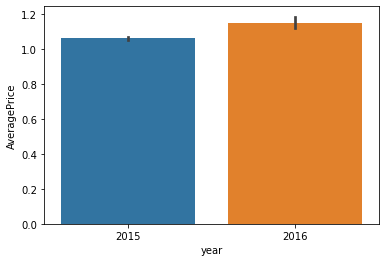

In [9]:
sns.barplot(df['year'],df['AveragePrice'],data=df)
plt.show()

In [10]:
df.groupby('year')['AveragePrice'].mean()

year
2015    1.060110
2016    1.151498
Name: AveragePrice, dtype: float64

In [11]:
print('Maximum Average price of avocado:',df['AveragePrice'].max())
print('Minimum Average price of avocado:',df['AveragePrice'].min())

Maximum Average price of avocado: 1.68
Minimum Average price of avocado: 0.49


Since this dataset is collected from multiple retailers, this column contains the indexes also which the retailers used in their respective data. Hecne we can drop this column since we already have a better index column.

In [12]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
df['type'].unique()

array(['conventional'], dtype=object)

In [14]:
df['type'].count

<bound method Series.count of 0       conventional
1       conventional
2       conventional
3       conventional
4       conventional
            ...     
1512    conventional
1513    conventional
1514    conventional
1515    conventional
1516    conventional
Name: type, Length: 1517, dtype: object>

The column 'type' is having only one value in the column 'conventional'. since all records have this common, it would not affect the modeling of the data. Similarly we can remove the 'Total Bags' column also.

In [15]:
df.drop(['Total Bags','type'], inplace=True, axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,Albany


In [16]:
print("Total number of 4046 labelled avodado sold: ",df['4046'].sum())
print("Total number of 4225 labelled avodado sold: ",df['4225'].sum())
print("Total number of 4770 labelled avodado sold: ",df['4770'].sum())

Total number of 4046 labelled avodado sold:  980647438.2900001
Total number of 4225 labelled avodado sold:  927550691.43
Total number of 4770 labelled avodado sold:  76465136.52000001


Sales of 4046 and 4225 is better when compared to 4770 labelled avocado.

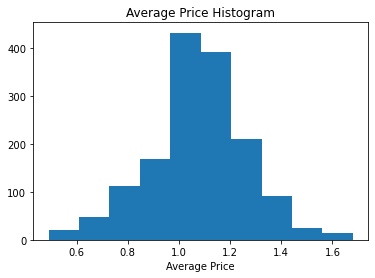

In [17]:
plt.hist(df['AveragePrice'])
plt.xlabel('Average Price')
plt.title('Average Price Histogram')
plt.show()

We will study the Averagre price and build a model which cn be able to predict the Average price based on the volume and quantity of the avocado and bags used. As this is a regression type problem hence we will be builing regression model and will select the one with best Accuracy.

In [18]:
# Let us look at the first 5 records of the dataframe df
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,Albany


We can extract the month information from the date column and then drop the date column

In [19]:
# create a new column month and add month from date column
df['month']=pd.DatetimeIndex(df['Date']).month
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,month
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.00,2015,Albany,12
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.00,2015,Albany,12
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.00,2015,Albany,12
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.00,2015,Albany,6
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.00,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,48823.53,10354.65,240.28,2016,Charlotte,10
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,54704.14,8596.56,0.00,2016,Charlotte,9
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,53332.61,8258.16,825.00,2016,Charlotte,2
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,55653.47,8278.26,0.00,2016,Charlotte,9


In [20]:
df['month'].unique()

array([12,  6, 11,  8,  1, 10,  4,  9,  2,  7,  5,  3])

In [21]:
# lets drop the date column
df.drop(['Date'], inplace=True, axis=1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,Albany,11


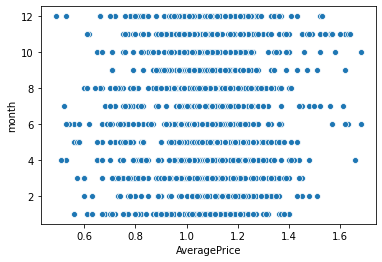

In [22]:
sns.scatterplot(x='AveragePrice', y='month', data=df)
plt.show()

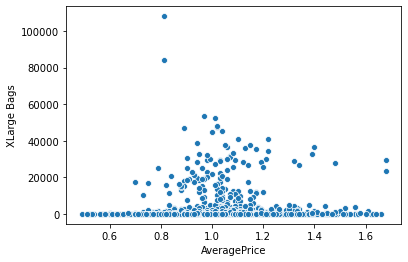

In [23]:
sns.scatterplot(x='AveragePrice', y='XLarge Bags', data=df)
plt.show()

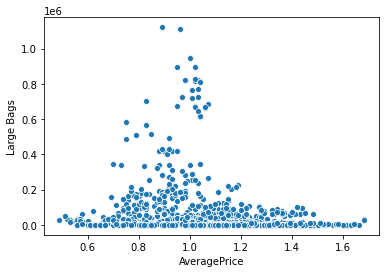

In [24]:
sns.scatterplot(x='AveragePrice', y='Large Bags', data=df)
plt.show()

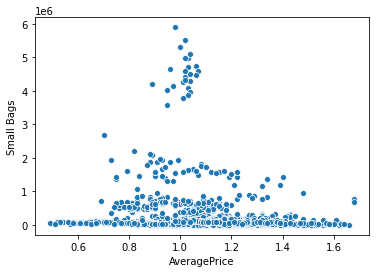

In [25]:
sns.scatterplot(x='AveragePrice', y='Small Bags', data=df)
plt.show()

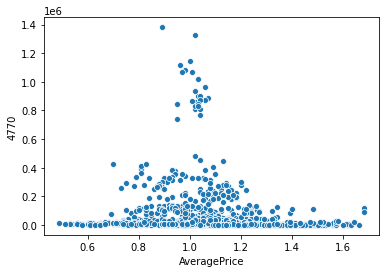

In [26]:
sns.scatterplot(x='AveragePrice', y='4770', data=df)
plt.show()

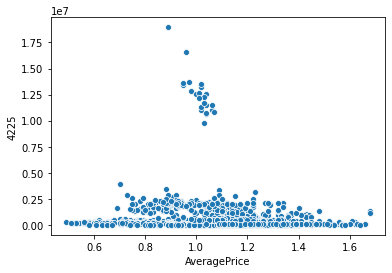

In [27]:
sns.scatterplot(x='AveragePrice', y='4225', data=df)
plt.show()

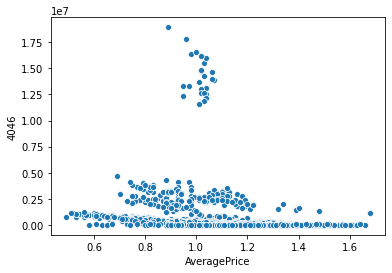

In [28]:
sns.scatterplot(x='AveragePrice', y='4046', data=df)
plt.show()

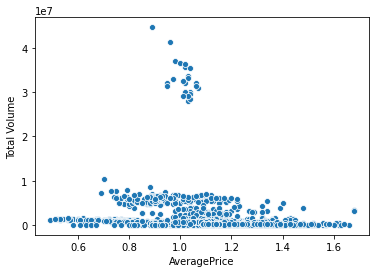

In [29]:
sns.scatterplot(x='AveragePrice', y='Total Volume', data=df)
plt.show()

There is high amount of skewness present

we have one categorical variable/feature 'region' that still need to be treated and converted into numerical one. we will use get dummies function of the pandas library to convert 'region' into numerical variable

In [30]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [31]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,Albany,11


In [32]:
# convert the region into categorical type
df.region = pd.Categorical(df.region)

In [33]:
# create a new column region code
df['region code'] = df.region.cat.codes

In [34]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,month,region code
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,Albany,12,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,Albany,12,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,Albany,12,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,Albany,6,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,Albany,11,0


In [35]:
df.drop(['region'],axis=1,inplace=True) # drop region column
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,month,region code
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,12,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,12,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,12,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,6,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,11,0


Now we have all the columns as numerical varibales

In [36]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,month,region code
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.097682,-0.177480,-0.048284,0.178683,0.060642,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.960642,0.910226,0.521717,-0.004189,-0.055212,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.922278,0.884229,0.474063,-0.040439,-0.053007,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.943988,0.900496,0.504718,-0.007254,-0.058429,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.923607,0.840523,0.646053,0.029222,-0.055079,0.138092
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,1.000000,0.879131,0.611300,0.106382,-0.048978,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.879131,1.000000,0.447779,-0.018678,-0.039242,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.611300,0.447779,1.000000,0.218342,0.021452,-0.046144
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.106382,-0.018678,0.218342,1.000000,-0.013144,-0.470472
month,0.060642,-0.055212,-0.053007,-0.058429,-0.055079,-0.048978,-0.039242,0.021452,-0.013144,1.000000,0.000977


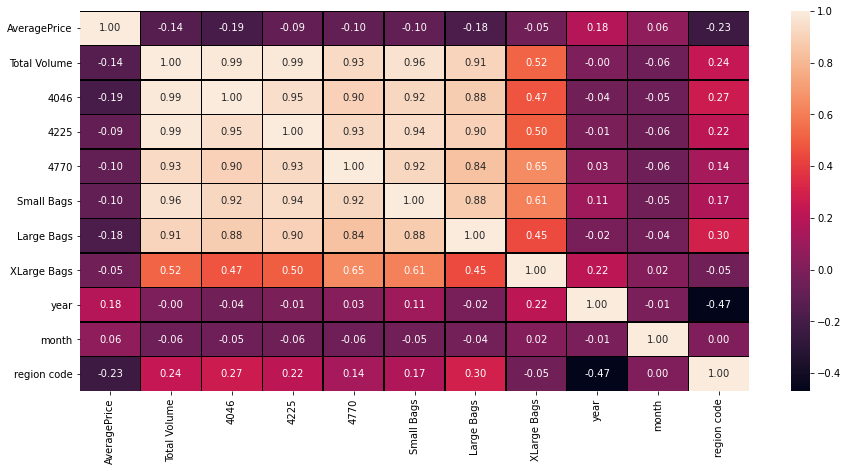

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f')
plt.show()

Correlation

Some of the observations from the above heat map

columns making positive corelation with AveragePrice
1. year
2. month

columns making negative corelation with AveragePrice
2. region code
3. XLarge Bags
4. Large Bags
5. Small Bags
6. 4770
7. 4225
8. 4046
9. Total Volume

In [38]:
# check for skewness
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
month           0.101439
region code     0.288146
dtype: float64

we can see that the below columns have highly skewd data

One of the assumptions for regression modeling is to have Normal distribution. Hence, we shaould remove the skeewness from the dataset to meet this assumption.

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,month,region code
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,12,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,12,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,12,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,6,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,11,0


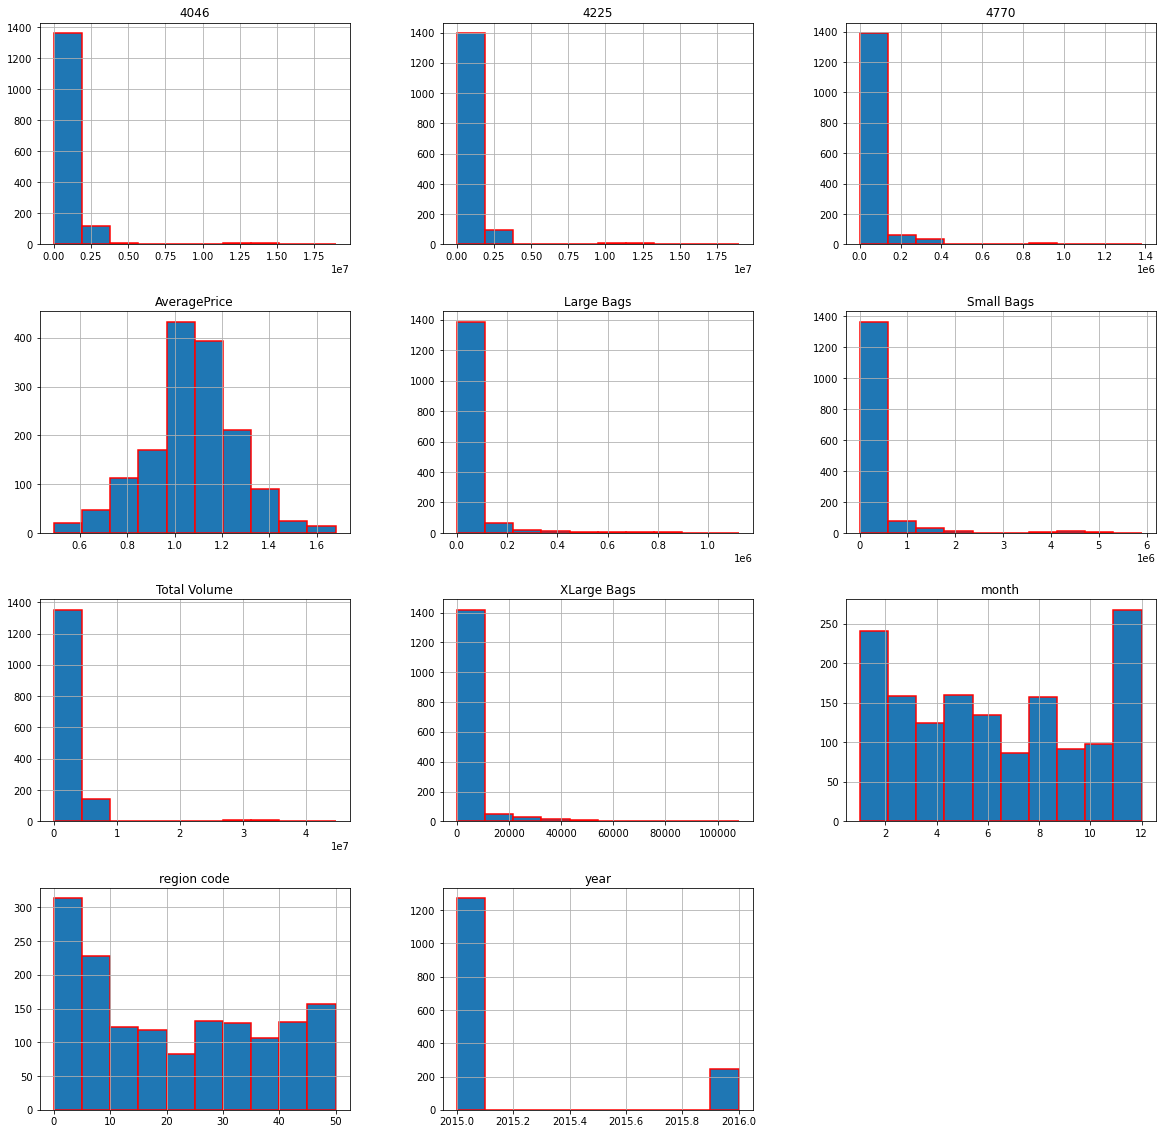

In [42]:
df.hist(edgecolor='red', linewidth=1.5, figsize=(20,20))
plt.show()

As we saw above the feature columns are not having good correlation with our target variable i.e. AveragePrice. But also we can see that many columns are highly skewed. Hecne we will transform the data by treating the skewness.

But we also see that the columns such as month, XLarge Bags and 4229 has correlation less than 0.1. Hence we it is better to drop these columns

In [45]:
df_new = df.drop(['month', 'XLarge Bags', '4225'], axis=1)
df_new.head()

,AveragePrice,Total Volume,4046,4770,Small Bags,Large Bags,year,region code
0,1.33,64236.62,1036.74,48.16,8603.62,93.25,2015,0
1,1.35,54876.98,674.28,58.33,9408.07,97.49,2015,0
2,0.93,118220.22,794.70,130.50,8042.21,103.14,2015,0
3,1.08,78992.15,1132.00,72.58,5677.40,133.76,2015,0
4,1.28,51039.60,941.48,75.78,5986.26,197.69,2015,0


In [46]:
df_new.corr()

,AveragePrice,Total Volume,4046,4770,Small Bags,Large Bags,year,region code
AveragePrice,1.000000,-0.140470,-0.190096,-0.100567,-0.097682,-0.177480,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.934347,0.960642,0.910226,-0.004189,0.236579
4046,-0.190096,0.985568,1.000000,0.898570,0.922278,0.884229,-0.040439,0.269481
4770,-0.100567,0.934347,0.898570,1.000000,0.923607,0.840523,0.029222,0.138092
Small Bags,-0.097682,0.960642,0.922278,0.923607,1.000000,0.879131,0.106382,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.840523,0.879131,1.000000,-0.018678,0.297452
year,0.178683,-0.004189,-0.040439,0.029222,0.106382,-0.018678,1.000000,-0.470472
region code,-0.229408,0.236579,0.269481,0.138092,0.168650,0.297452,-0.470472,1.000000


Data Transformation

we need to transform the columns which have skewness :
1. Total Volume
2. 4046
3. 4770
4. Small Bags
5. Large Bags

In [47]:
df_new.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4770            5.405164
Small Bags      5.355185
Large Bags      5.144495
year            1.828332
region code     0.288146
dtype: float64

# Outliers check

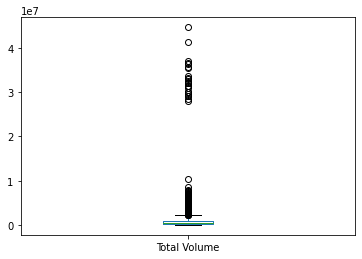

In [49]:
df['Total Volume'].plot.box()
plt.show()

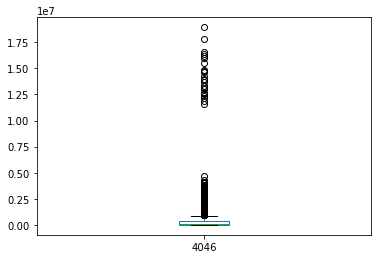

In [50]:
df['4046'].plot.box()
plt.show()

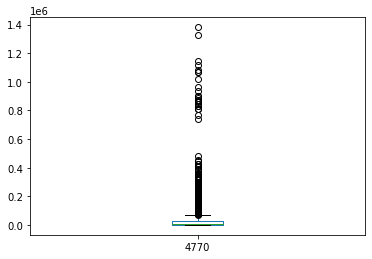

In [51]:
df['4770'].plot.box()
plt.show()

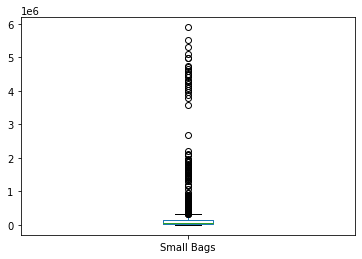

In [52]:
df['Small Bags'].plot.box()
plt.show()

Check the percentage of data falls under outliers

In [53]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_new))
threshold=3
np.where(z>3)

(array([ 412,  760, 1059, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183,
        1183, 1183, 1184, 1184, 1184, 1184, 1184, 1185, 1185, 1185, 1185,
        1185, 1186, 1186, 1186, 1186, 1186, 1187, 1187, 1187, 1187, 1187,
        1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189, 1190,
        1190, 1190, 1190, 1190, 1191, 1191, 1191, 1191, 1191, 1192, 1192,
        1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1194, 1194, 1194,
        1194, 1194, 1195, 1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196,
        1196, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198, 1198,
        1199, 1199, 1199, 1199, 1199, 1200, 1200, 1200, 1200, 1200, 1201,
        1201, 1201, 1201, 1201, 1202, 1202, 1202, 1202, 1202, 1203, 1203,
        1203, 1203, 1203, 1204, 1204, 1204, 1204, 1204, 1205, 1205, 1205,
        1205, 1205, 1206, 1206, 1206, 1206, 1206, 1207, 1208, 1209, 1210,
        1212, 1213, 1215, 1216, 1217, 1218, 1222, 1411, 1457, 1458, 1483,
        1484, 1495, 1496]),
 array([3,

In [56]:
df1 = df_new[(z<3).all(axis=1)]

In [57]:
df1

,AveragePrice,Total Volume,4046,4770,Small Bags,Large Bags,year,region code
0,1.33,64236.62,1036.74,48.16,8603.62,93.25,2015,0
1,1.35,54876.98,674.28,58.33,9408.07,97.49,2015,0
2,0.93,118220.22,794.70,130.50,8042.21,103.14,2015,0
3,1.08,78992.15,1132.00,72.58,5677.40,133.76,2015,0
4,1.28,51039.60,941.48,75.78,5986.26,197.69,2015,0
...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,17531.78,48823.53,10354.65,2016,7
1513,1.51,178235.75,43325.87,19419.57,54704.14,8596.56,2016,7
1514,1.48,178410.82,46364.75,16736.92,53332.61,8258.16,2016,7
1515,1.47,189131.52,54110.79,17495.42,55653.47,8278.26,2016,7


In [59]:
df1.shape

(1471, 8)

Initially total number of records were (1517, 14). After treating the outliers we got the shape as (1471, 8). 
Lets look at the percentage loss in the records

In [60]:
print("Total number of records lost = ",1517-1471)

Total number of records lost =  46


In [61]:
# percentage loss
percent_loss = (46/1517)*100
print(percent_loss)

3.032300593276203


Since the percentage of outliers are less than 5% hence we can proceed for outlier removal

In [62]:
# Lets us also check the outliers from IQR method
Q1 = df_new.quantile(.25)
Q3 = df_new.quantile(.75)
IQR = Q3-Q1
print(IQR)

AveragePrice         0.21
Total Volume    834505.09
4046            357178.14
4770             28256.05
Small Bags      116472.13
Large Bags       28726.93
year                 0.00
region code         29.00
dtype: float64


In [63]:
df2 = df_new[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2.shape)

(977, 8)


In [64]:
print("Total number of records lost = ",1517-977)

Total number of records lost =  540


In [65]:
# percentage loss
percent_loss = (540/1517)*100
print(percent_loss)

35.596572181938036


Since with IQR method we are loosing 35% of data, hence we will confirm the zscore method for the outlier removal

Removing Skewness from the data by transformation method

In [69]:
df1.head()

,AveragePrice,Total Volume,4046,4770,Small Bags,Large Bags,year,region code
0,1.33,64236.62,1036.74,48.16,8603.62,93.25,2015,0
1,1.35,54876.98,674.28,58.33,9408.07,97.49,2015,0
2,0.93,118220.22,794.70,130.50,8042.21,103.14,2015,0
3,1.08,78992.15,1132.00,72.58,5677.40,133.76,2015,0
4,1.28,51039.60,941.48,75.78,5986.26,197.69,2015,0


In [73]:
x=df1.drop(['AveragePrice'],axis=1)
y=pd.DataFrame(df1['AveragePrice'])

In [74]:
x.head(2)

,Total Volume,4046,4770,Small Bags,Large Bags,year,region code
0,64236.62,1036.74,48.16,8603.62,93.25,2015,0
1,54876.98,674.28,58.33,9408.07,97.49,2015,0


In [75]:
y.head(2)

,AveragePrice
0,1.33
1,1.35


In [76]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Regresion Model Building Methods

Linear Regression

In [88]:
# scaling the datset using standard scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledX = sc.fit_transform(x)

In [89]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Finding the best random state
best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu > accu:
        accu = tempaccu
        best_rstate = i
        
print(f"Best Accuracy {accu*100} found on Random state {best_rstate}")

Best Accuracy 36.97913547846221 found on Random state 40


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20, random_state=40)

We will use the random state 40

Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(LinearRegression(), x_train, y_train, cv=5).mean()

print(f"Accuracy= {r2score*100}, cross_val_score= {cvscore*100} & difference= {(r2score*100)-(cvscore*100)}")

Accuracy= 36.99846046511573, cross_val_score= 24.934044882687363 & difference= 12.064415582428364


RandomForest Regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(RandomForestRegressor(), x_train, y_train, cv=5).mean()

print(f"Accuracy= {r2score*100}, cross_val_score= {cvscore*100} & difference= {(r2score*100)-(cvscore*100)}")

Accuracy= 79.3269212681406, cross_val_score= 73.90578413867347 & difference= 5.421137129467127


Adaboost Regressor

In [93]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred = ADB.predict(x_test)

r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(AdaBoostRegressor(), x_train, y_train, cv=5).mean()

print(f"Accuracy= {r2score*100}, cross_val_score= {cvscore*100} & difference= {(r2score*100)-(cvscore*100)}")

Accuracy= 60.11595482305852, cross_val_score= 52.583941945003644 & difference= 7.5320128780548785


SGD Regressor

In [94]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)

r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(SGDRegressor(), x_train, y_train, cv=5).mean()

print(f"Accuracy= {r2score*100}, cross_val_score= {cvscore*100} & difference= {(r2score*100)-(cvscore*100)}")

Accuracy= 36.6001118230578, cross_val_score= 24.936878813576108 & difference= 11.663233009481694


RandomForest Regressor is the best performing model in this case 